In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

print("Libraries imported successfully.")

Libraries imported successfully.


In [28]:
# Display settings
pd.set_option('display.max_columns', None)

# Load CSV
df = pd.read_csv("CIT2024.csv")  # replace with your file path

print(f"The dataset has been loaded successfully.")
print(f"Shape:{df.shape[0]:,} rows x {df.shape[1]} columns")

The dataset has been loaded successfully.
Shape:313,870 rows x 61 columns


In [29]:
# Preview data
print(df.shape)
display(df.head())
df.info()

(313870, 61)


,unique_id,business_type,business_subtype,epz_effective_dt,period_from,period_to,filing_date,is_nil_return,return_type,assmt_type,eff_dt_com_activity,sector,division_,group_,class_,grossturnover,cost_of_sales,total_opening_stock,total_purchase_and_imports,odc_tot_of_other_direct_costs,odc_factory_rent_and_rates,fact_ovh_fuel_and_power,fact_ovh_indirect_wages,fact_ovh_consumables,fact_ovh_depreciation,other_factory_overheads,total_factory_overheads,total_closing_stock,gross_profit,total_other_income,total_other_income_int,oi_dividend,oi_commision,oi_natural_resource_payments,oi_royalties,oi_gift_in_conn_wth_prprty,oi_prof_of_disposal_of_assets,oi_realized_exchange_gain,oi_unrealized_exchange_gain,oi_prvsn_for_bad_doubtful_db,insurance_comp,tot_opexp,admexp_depreciation,admexp__loss_disposal_assets,admexp__scntfc_research_exp,admexp__mgmt_exp,total_administrative_exp,total_employment_exp,total_financing_exp,profit_loss_before_tax,income_tax_exp,prof_loss_tax_div_bal_st,empexp__salary_wages,init_plant_mach_allow,init_indu_buld_allow,cap_allw_indu_buld,wear_tear_dedc_rbm,wear_tear_dedc_slm,deduct_agri_land,tot_allow_deductions,avg_no_of_employees
0,1.210000e+09,Company,Private Company,NaN,1/1/2024,31/12/2024,27/06/2025,N,Original,S,NaN,SERVICE ACTIVITIES,951-Repair of computers and personal and house...,9521-Repair of consumer electronics,8411 - General public administration activities,3605224.88,2350913.80,0.0,2350913.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1254311.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,842870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,8191.08,NaN,8191.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.210001e+10,Company,Private Company,NaN,1/1/2024,31/12/2024,27/06/2025,Y,Original,S,NaN,SERVICE ACTIVITIES,961-personal service activities,9602-Hairdressing and other beauty treatment,9602 - Hairdressing and other beauty treatment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1.210002e+10,Company,Private Company,NaN,1/1/2024,31/12/2024,27/05/2025,N,Original,S,NaN,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","461-Wholesale trade, except of motor vehicles ...",4614-Wholesale of other household goods,8110 - Combined facilities support activities,67712664.54,66436372.67,107900.0,67328772.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000300.0,1276291.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,525700.0,1853.1,0.0,0.0,0.0,251853.1,250000.0,74854.64,151384.13,NaN,151384.13,250000.0,0.0,0.0,0.0,1853.1,0.0,0.0,1853.1,NaN
3,1.210002e+10,Company,Private Company,NaN,1/1/2024,31/12/2024,20/05/2025,Y,Original,S,NaN,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","471-Retail trade, except of motor vehicles and...","4720-Retail sale of hardware, paints and glass...",8620 - Medical and dental practice activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.210002e+10,Company,Private Company,NaN,1/1/2024,31/12/2024,29/06/2025,N,Original,S,NaN,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",701-Activities of head offices; management con...,7020-Management consultancy activities,NaN,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,200833.0,202523.0,1690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,8237.00,114704.00,NaN,114704.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313870 entries, 0 to 313869
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   unique_id                      313870 non-null  float64
 1   business_type                  313870 non-null  object 
 2   business_subtype               310874 non-null  object 
 3   epz_effective_dt               149 non-null     object 
 4   period_from                    313870 non-null  object 
 5   period_to                      313870 non-null  object 
 6   filing_date                    313870 non-null  object 
 7   is_nil_return                  313870 non-null  object 
 8   return_type                    313870 non-null  object 
 9   assmt_type                     313870 non-null  object 
 10  eff_dt_com_activity            85 non-null      object 
 11  sector                         313862 non-null  object 
 12  division_                     

In [30]:
print(df.columns)

Index(['unique_id', 'business_type', 'business_subtype', 'epz_effective_dt',
       'period_from', 'period_to', 'filing_date', 'is_nil_return',
       'return_type', 'assmt_type', 'eff_dt_com_activity', 'sector',
       'division_', 'group_', 'class_', 'grossturnover', 'cost_of_sales',
       'total_opening_stock', 'total_purchase_and_imports',
       'odc_tot_of_other_direct_costs', 'odc_factory_rent_and_rates',
       'fact_ovh_fuel_and_power', 'fact_ovh_indirect_wages',
       'fact_ovh_consumables', 'fact_ovh_depreciation',
       'other_factory_overheads', 'total_factory_overheads',
       'total_closing_stock', 'gross_profit', 'total_other_income',
       'total_other_income_int', 'oi_dividend', 'oi_commision',
       'oi_natural_resource_payments', 'oi_royalties',
       'oi_gift_in_conn_wth_prprty', 'oi_prof_of_disposal_of_assets',
       'oi_realized_exchange_gain', 'oi_unrealized_exchange_gain',
       'oi_prvsn_for_bad_doubtful_db', 'insurance_comp', 'tot_opexp',
       'adm

In [31]:
df.nunique()

unique_id               62813
business_type               7
business_subtype           18
epz_effective_dt            1
period_from               361
                        ...  
wear_tear_dedc_rbm      45779
wear_tear_dedc_slm          1
deduct_agri_land          164
tot_allow_deductions    45975
avg_no_of_employees       841
Length: 61, dtype: int64

In [32]:
missing = df.isnull().sum().reset_index()
missing.columns = ['column', 'missing_count']
print(missing)


                  column  missing_count
0              unique_id              0
1          business_type              0
2       business_subtype           2996
3       epz_effective_dt         313721
4            period_from              0
..                   ...            ...
56    wear_tear_dedc_rbm         201346
57    wear_tear_dedc_slm         201345
58      deduct_agri_land         201345
59  tot_allow_deductions         201345
60   avg_no_of_employees         253652

[61 rows x 2 columns]


In [33]:
nulls = df.isna().sum()

null_percent = (nulls[nulls > 0] / len(df) * 100).sort_values(ascending=False)

null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')


,% Null
eff_dt_com_activity,99.972919
epz_effective_dt,99.952528
income_tax_exp,96.193328
avg_no_of_employees,80.814350
class_,65.181763
admexp_depreciation,64.150763
oi_gift_in_conn_wth_prprty,64.150763
oi_prof_of_disposal_of_assets,64.150763
oi_realized_exchange_gain,64.150763
oi_unrealized_exchange_gain,64.150763


In [34]:
cols_over_75_missing = df.columns[df.isnull().mean() > 0.75]
print(cols_over_75_missing)


Index(['epz_effective_dt', 'eff_dt_com_activity', 'income_tax_exp',
       'avg_no_of_employees'],
      dtype='object')


In [35]:
df = df.drop(columns = cols_over_75_missing)
print(df.shape)
display(df.head())


(313870, 57)


,unique_id,business_type,business_subtype,period_from,period_to,filing_date,is_nil_return,return_type,assmt_type,sector,division_,group_,class_,grossturnover,cost_of_sales,total_opening_stock,total_purchase_and_imports,odc_tot_of_other_direct_costs,odc_factory_rent_and_rates,fact_ovh_fuel_and_power,fact_ovh_indirect_wages,fact_ovh_consumables,fact_ovh_depreciation,other_factory_overheads,total_factory_overheads,total_closing_stock,gross_profit,total_other_income,total_other_income_int,oi_dividend,oi_commision,oi_natural_resource_payments,oi_royalties,oi_gift_in_conn_wth_prprty,oi_prof_of_disposal_of_assets,oi_realized_exchange_gain,oi_unrealized_exchange_gain,oi_prvsn_for_bad_doubtful_db,insurance_comp,tot_opexp,admexp_depreciation,admexp__loss_disposal_assets,admexp__scntfc_research_exp,admexp__mgmt_exp,total_administrative_exp,total_employment_exp,total_financing_exp,profit_loss_before_tax,prof_loss_tax_div_bal_st,empexp__salary_wages,init_plant_mach_allow,init_indu_buld_allow,cap_allw_indu_buld,wear_tear_dedc_rbm,wear_tear_dedc_slm,deduct_agri_land,tot_allow_deductions
0,1.210000e+09,Company,Private Company,1/1/2024,31/12/2024,27/06/2025,N,Original,S,SERVICE ACTIVITIES,951-Repair of computers and personal and house...,9521-Repair of consumer electronics,8411 - General public administration activities,3605224.88,2350913.80,0.0,2350913.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1254311.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,842870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,8191.08,8191.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.210001e+10,Company,Private Company,1/1/2024,31/12/2024,27/06/2025,Y,Original,S,SERVICE ACTIVITIES,961-personal service activities,9602-Hairdressing and other beauty treatment,9602 - Hairdressing and other beauty treatment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.210002e+10,Company,Private Company,1/1/2024,31/12/2024,27/05/2025,N,Original,S,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","461-Wholesale trade, except of motor vehicles ...",4614-Wholesale of other household goods,8110 - Combined facilities support activities,67712664.54,66436372.67,107900.0,67328772.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000300.0,1276291.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,525700.0,1853.1,0.0,0.0,0.0,251853.1,250000.0,74854.64,151384.13,151384.13,250000.0,0.0,0.0,0.0,1853.1,0.0,0.0,1853.1
3,1.210002e+10,Company,Private Company,1/1/2024,31/12/2024,20/05/2025,Y,Original,S,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","471-Retail trade, except of motor vehicles and...","4720-Retail sale of hardware, paints and glass...",8620 - Medical and dental practice activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.210002e+10,Company,Private Company,1/1/2024,31/12/2024,29/06/2025,N,Original,S,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",701-Activities of head offices; management con...,7020-Management consultancy activities,NaN,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,200833.0,202523.0,1690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,8237.00,114704.00,114704.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Numeric columns → median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [37]:
missing = df.isnull().sum().reset_index()
missing.columns = ['column', 'missing_count']
print(missing)

                           column  missing_count
0                       unique_id              0
1                   business_type              0
2                business_subtype              0
3                     period_from              0
4                       period_to              0
5                     filing_date              0
6                   is_nil_return              0
7                     return_type              0
8                      assmt_type              0
9                          sector              0
10                      division_              0
11                         group_              0
12                         class_              0
13                  grossturnover              0
14                  cost_of_sales              0
15            total_opening_stock              0
16     total_purchase_and_imports              0
17  odc_tot_of_other_direct_costs              0
18     odc_factory_rent_and_rates              0
19        fact_ovh_f

In [38]:
df.duplicated().sum()

82249

In [39]:
df = df.drop_duplicates()


In [40]:
df.shape

(231621, 57)

In [41]:
df.describe()

,unique_id,grossturnover,cost_of_sales,total_opening_stock,total_purchase_and_imports,odc_tot_of_other_direct_costs,odc_factory_rent_and_rates,fact_ovh_fuel_and_power,fact_ovh_indirect_wages,fact_ovh_consumables,fact_ovh_depreciation,other_factory_overheads,total_factory_overheads,total_closing_stock,gross_profit,total_other_income,total_other_income_int,oi_dividend,oi_commision,oi_natural_resource_payments,oi_royalties,oi_gift_in_conn_wth_prprty,oi_prof_of_disposal_of_assets,oi_realized_exchange_gain,oi_unrealized_exchange_gain,oi_prvsn_for_bad_doubtful_db,insurance_comp,tot_opexp,admexp_depreciation,admexp__loss_disposal_assets,admexp__scntfc_research_exp,admexp__mgmt_exp,total_administrative_exp,total_employment_exp,total_financing_exp,profit_loss_before_tax,prof_loss_tax_div_bal_st,empexp__salary_wages,init_plant_mach_allow,init_indu_buld_allow,cap_allw_indu_buld,wear_tear_dedc_rbm,wear_tear_dedc_slm,deduct_agri_land,tot_allow_deductions
count,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,2.316210e+05,231621.0,2.316210e+05,2.316210e+05
mean,9.142140e+10,4.901851e+07,3.249985e+07,4.268495e+06,1.750039e+07,1.218995e+07,1.633926e+04,2.000836e+05,2.463244e+04,3.687185e+04,1.525275e+05,1.996623e+05,6.301164e+05,2.460048e+06,1.572477e+07,1.300492e+07,1.440407e+07,3.729379e+05,3.997659e+05,2.087018e+02,1.050040e+03,5.508847e+02,3.164269e+04,2.316800e+05,3.434296e+05,7.817843e+03,1.006855e+04,1.383419e+06,6.517419e+05,7.321939e+03,1.645561e+03,7.467210e+04,4.008158e+06,3.261527e+06,1.890966e+06,4.359038e+06,3.796950e+06,2.801926e+06,1.194195e+05,6.342604e+04,1.038883e+05,6.549174e+05,0.0,1.945280e+04,9.778563e+05
std,4.966976e+10,1.610332e+09,1.357877e+09,2.389985e+08,3.572480e+08,1.263657e+09,1.031914e+06,1.683873e+07,3.077702e+06,3.324475e+06,9.503615e+06,1.578504e+07,3.706937e+07,4.722629e+07,7.185152e+08,3.827160e+09,3.829336e+09,5.076076e+07,6.628967e+07,4.007501e+04,2.366508e+05,9.273721e+04,3.513189e+06,2.499970e+07,2.181975e+07,1.759607e+06,1.664674e+06,4.806765e+07,2.779370e+07,6.727323e+05,3.101150e+05,6.036372e+06,1.185324e+08,9.997652e+07,1.421924e+08,3.628615e+08,3.556480e+08,7.935770e+07,1.344818e+07,5.906092e+06,1.099333e+07,2.485179e+07,0.0,1.648537e+06,3.393291e+07
min,1.210524e+06,0.000000e+00,-4.846088e+08,-1.372886e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.232220e+10,-6.337600e+07,-6.337600e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.325909e+06,-1.251893e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.202384e+06,-1.960661e+10,-1.960661e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,1.286394e+10,3.154748e+06,7.200000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.027180e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.002000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.177200e+04,0.000000e+00,6.606500e+03,1.163207e+04,1.075416e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,1.210000e+11,3.154748e+06,7.200000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

In [42]:
# Save cleaned dataset as Excel
#df.to_excel("clean_processed_data.xlsx", index=False)


In [43]:
# Convert date columns
date_cols = ['period_from', 'period_to', 'filing_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert key numeric columns
numeric_cols = [
    'grossturnover', 'cost_of_sales', 'gross_profit',
    'total_factory_overheads', 'tot_opexp',
    'profit_loss_before_tax', 'tot_allow_deductions'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 231621 entries, 0 to 313869
Data columns (total 57 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   unique_id                      231621 non-null  float64       
 1   business_type                  231621 non-null  object        
 2   business_subtype               231621 non-null  object        
 3   period_from                    212065 non-null  datetime64[ns]
 4   period_to                      231621 non-null  datetime64[ns]
 5   filing_date                    231621 non-null  datetime64[ns]
 6   is_nil_return                  231621 non-null  object        
 7   return_type                    231621 non-null  object        
 8   assmt_type                     231621 non-null  object        
 9   sector                         231621 non-null  object        
 10  division_                      231621 non-null  object        
 11  group

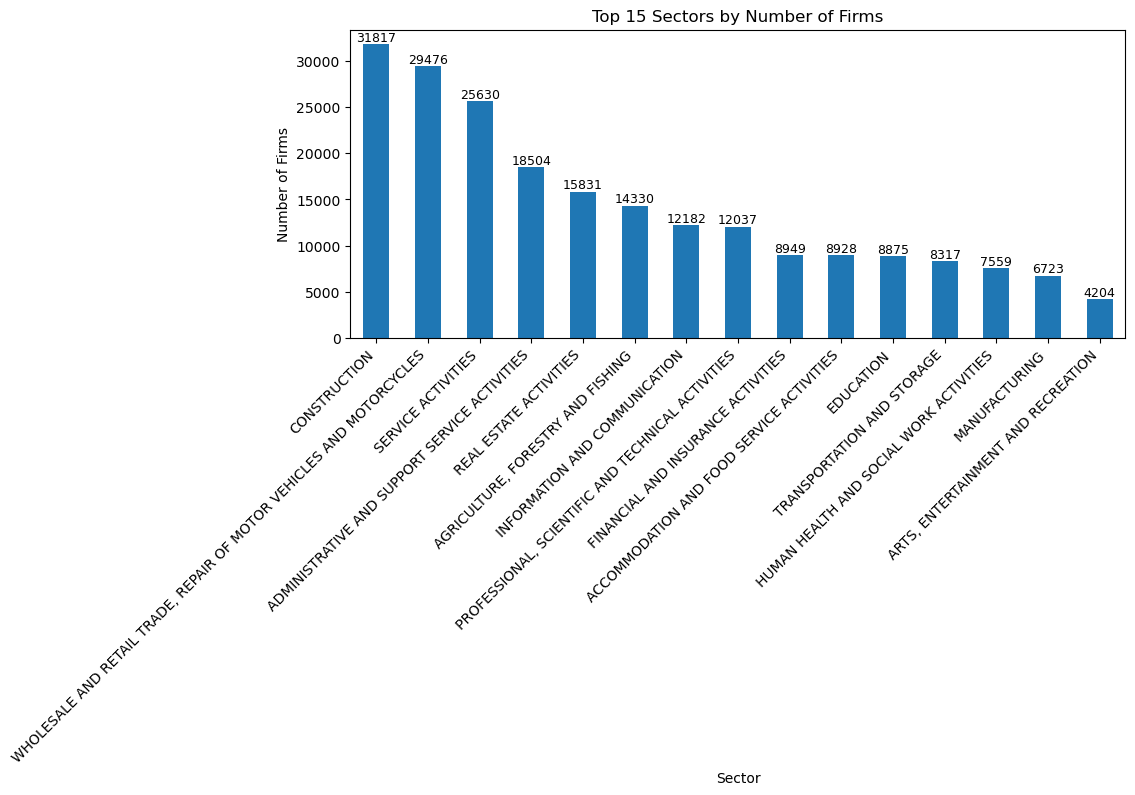

In [44]:
top10_sectors = df['sector'].value_counts().head(15)

plt.figure(figsize=(10,4))
ax = top10_sectors.plot(kind='bar')

for i, v in enumerate(top10_sectors):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.title("Top 15 Sectors by Number of Firms")
plt.ylabel("Number of Firms")
plt.xlabel("Sector")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

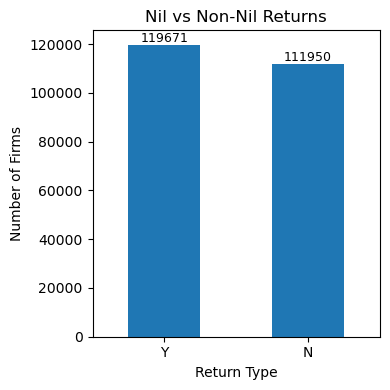

In [45]:
# Nil vs Non-Nil returns
plt.figure(figsize=(4,4))

counts = df['is_nil_return'].value_counts()
ax = counts.plot(kind='bar')

# Add value labels on bars
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.title("Nil vs Non-Nil Returns")
plt.xlabel("Return Type")
plt.ylabel("Number of Firms")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



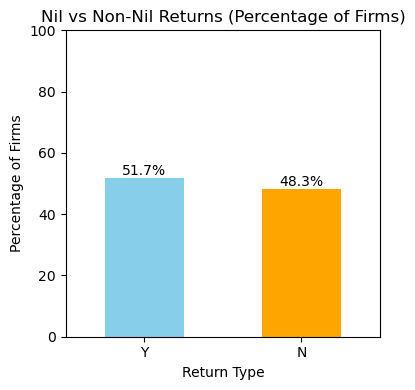

In [46]:
# Compute percentages
counts_pct = df['is_nil_return'].value_counts(normalize=True) * 100

plt.figure(figsize=(4,4))
ax = counts_pct.plot(kind='bar', color=['skyblue', 'orange'])

# Add value labels
for i, v in enumerate(counts_pct):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Nil vs Non-Nil Returns (Percentage of Firms)")
plt.xlabel("Return Type")
plt.ylabel("Percentage of Firms")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


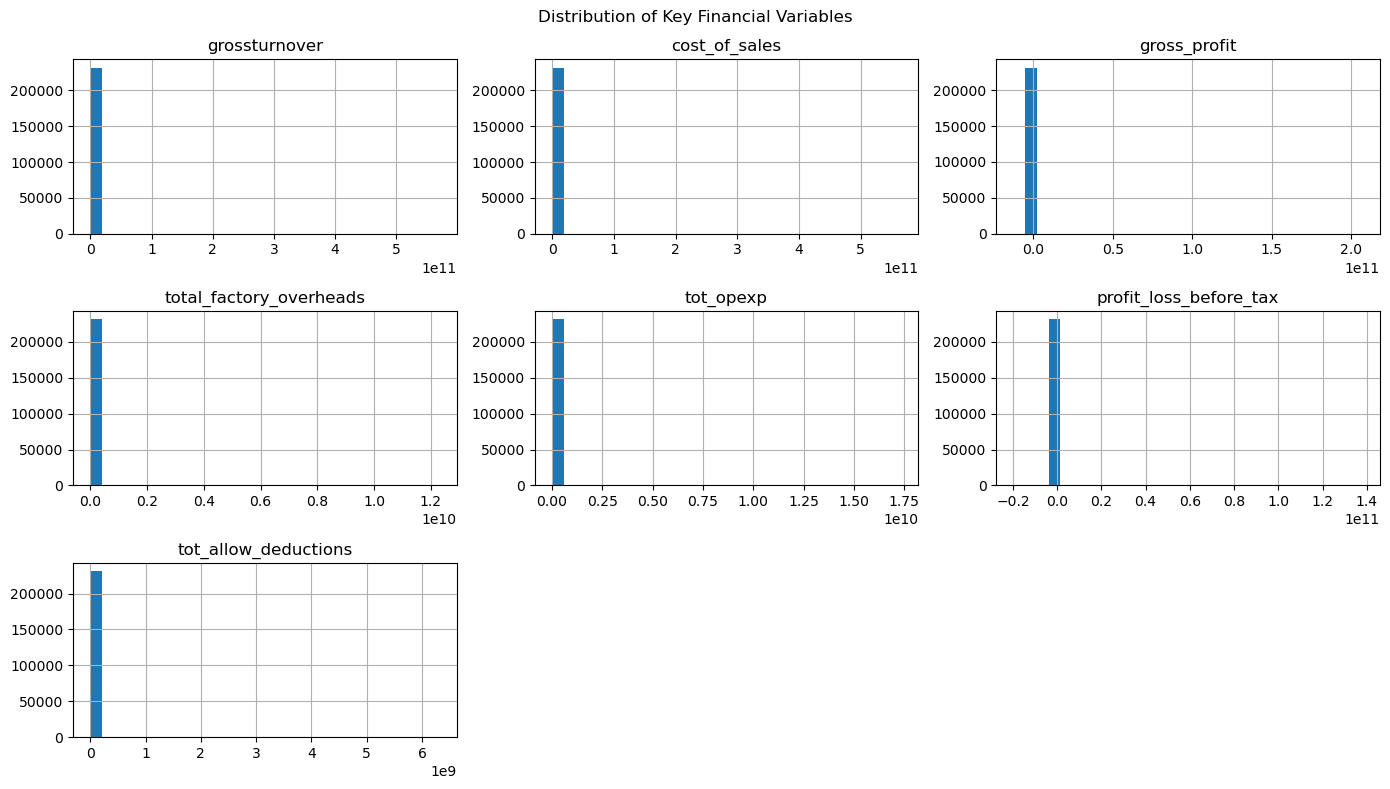

In [47]:
# Histograms
df[numeric_cols].hist(bins=30, figsize=(14,8))
plt.suptitle("Distribution of Key Financial Variables")
plt.tight_layout()
plt.show()


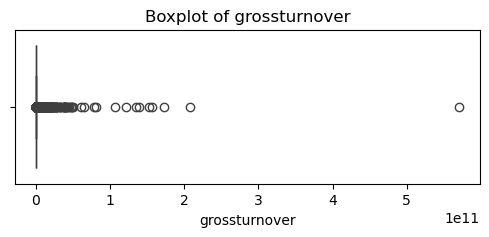

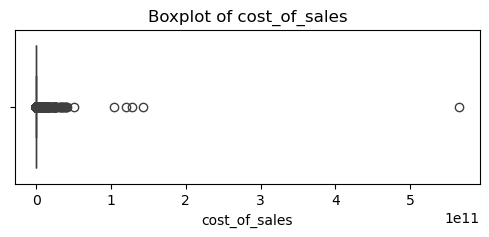

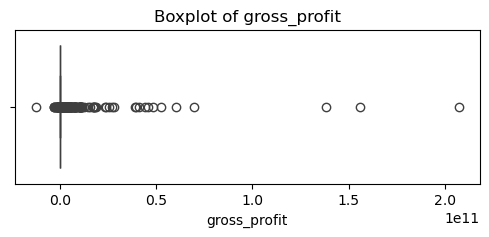

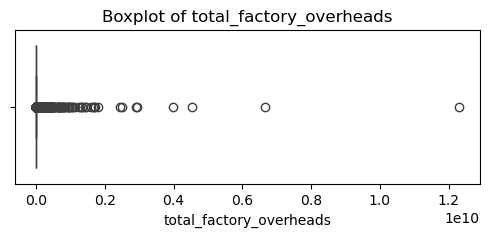

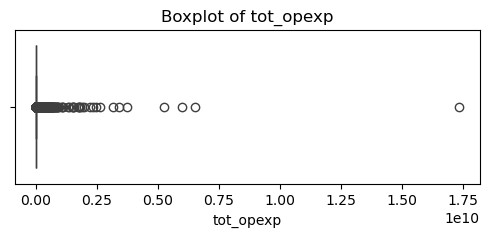

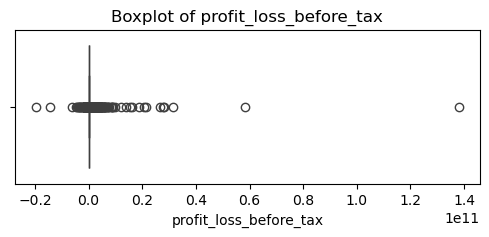

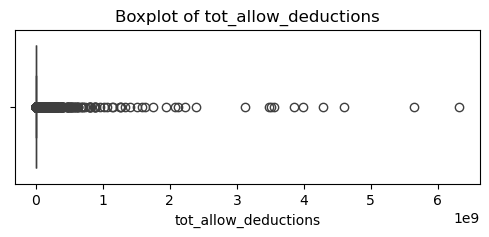

In [48]:
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


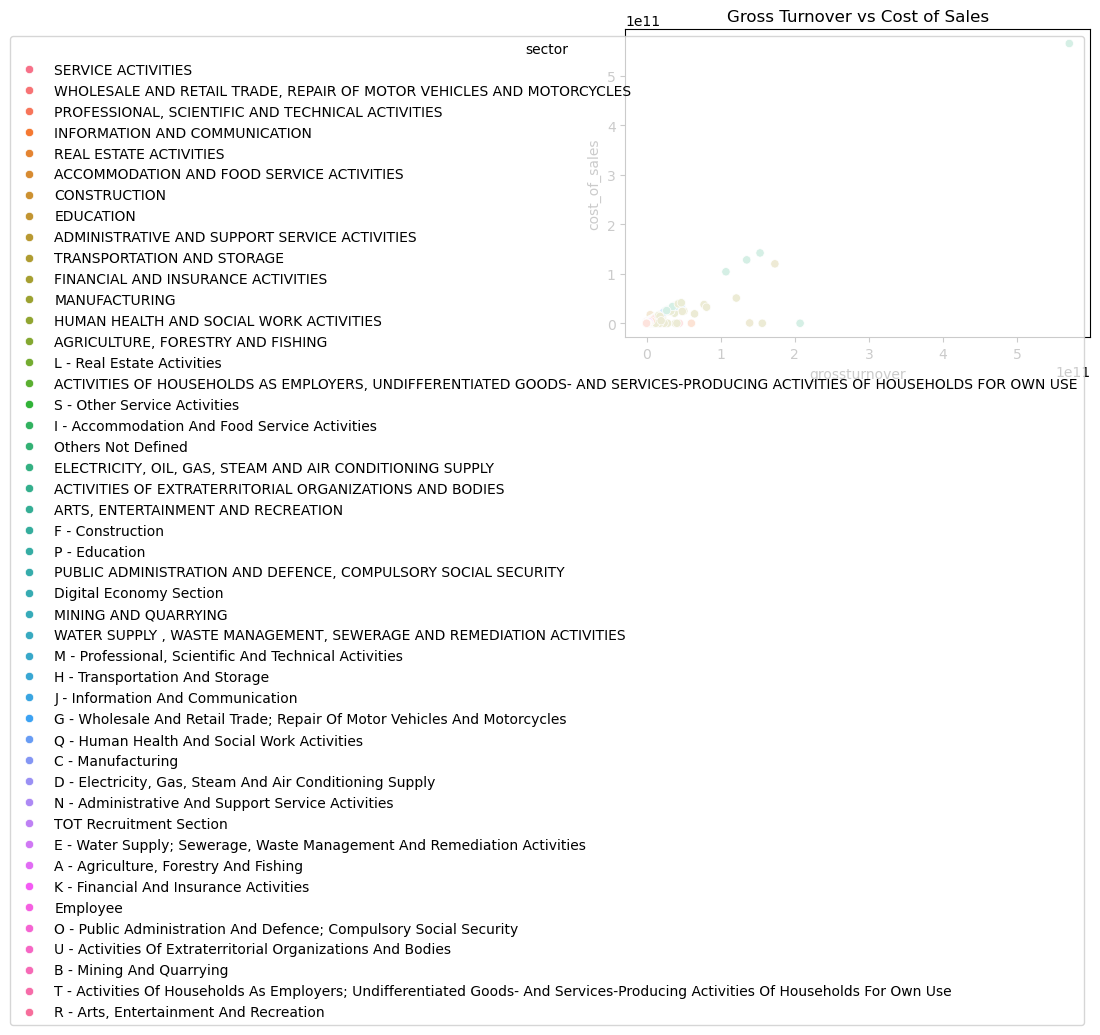

In [49]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='grossturnover', y='cost_of_sales', hue='sector')
plt.title("Gross Turnover vs Cost of Sales")
plt.show()


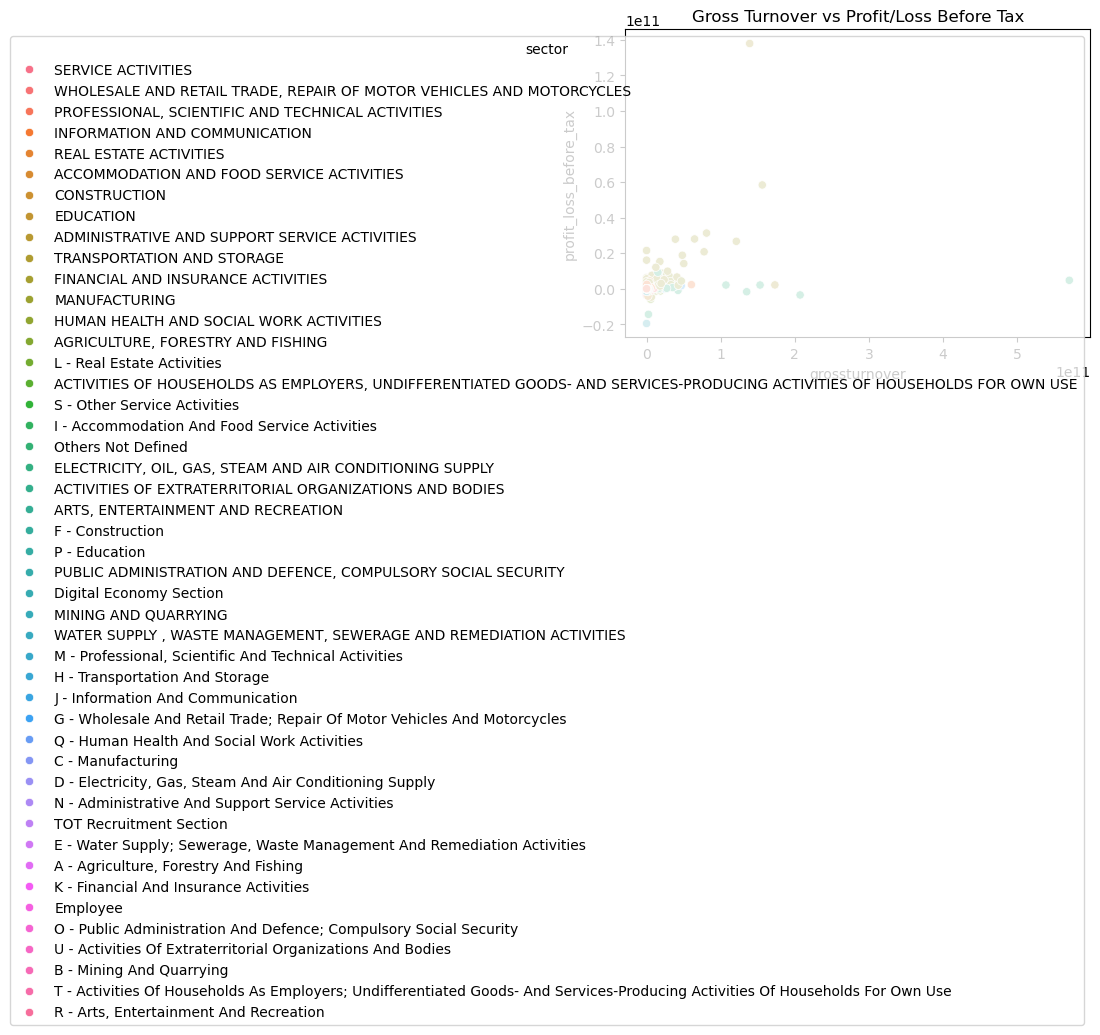

In [50]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='grossturnover', y='profit_loss_before_tax', hue='sector')
plt.title("Gross Turnover vs Profit/Loss Before Tax")
plt.show()


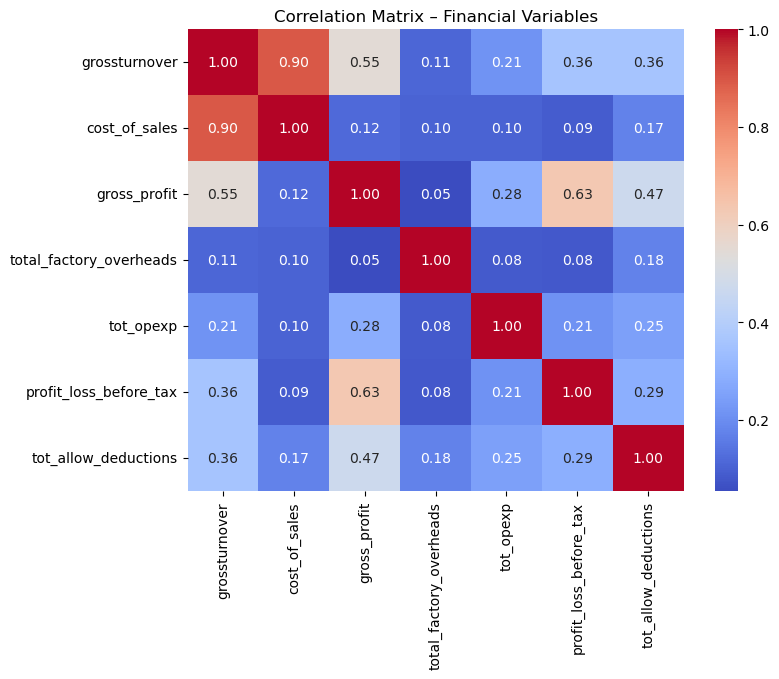

In [51]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix – Financial Variables")
plt.show()


In [52]:
# Financial ratios
df['gross_margin'] = df['gross_profit'] / df['grossturnover']
df['cost_ratio'] = df['cost_of_sales'] / df['grossturnover']
df['profit_margin'] = df['profit_loss_before_tax'] / df['grossturnover']

df[['gross_margin', 'cost_ratio', 'profit_margin']].describe()


,gross_margin,cost_ratio,profit_margin
count,2.207250e+05,2.207250e+05,2.316210e+05
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,-inf,-inf,-inf
25%,2.861458e-01,2.282274e-01,3.687163e-03
50%,2.861458e-01,2.282274e-01,3.687163e-03
75%,3.215903e-01,5.281739e-01,5.513762e-03
max,inf,inf,inf
